In [1]:
#import necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Loading The Data
df = pd.read_csv('comments.csv')

In [3]:
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [4]:
df.tail()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
18404,18404,cyLWtMSry58,I really like the point about engineering tool...,0.0,2.0
18405,18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20.0,2.0
18406,18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1.0,1.0
18407,18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35.0,2.0
18408,18408,cyLWtMSry58,This is great. Focus is key. A playful approac...,0.0,2.0


In [5]:
df.shape

(18409, 5)

### Data Cleaning and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Video ID', 'Comment', 'Likes', 'Sentiment'], dtype='object')

In [8]:
df.drop(['Unnamed: 0', 'Video ID', 'Likes'], axis=1, inplace=True) # dropping irrelavant Features

#### Handling  The Null Values 

In [9]:
df.isnull().sum() 

Comment      1
Sentiment    0
dtype: int64

In [10]:
df.dropna(subset='Comment', inplace=True)

### Handling Duplicates

In [11]:
df.duplicated().sum()

414

In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17994 entries, 0 to 18408
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Comment    17994 non-null  object 
 1   Sentiment  17994 non-null  float64
dtypes: float64(1), object(1)
memory usage: 421.7+ KB


In [14]:
df['Sentiment'].value_counts()

Sentiment
2.0    11141
1.0     4532
0.0     2321
Name: count, dtype: int64

### Removing irrelevant comments

In [15]:
import emoji

In [16]:
df.head(1)

,Comment,Sentiment
0,Let's not forget that Apple Pay in 2014 requir...,1.0


In [17]:
hyperlink_pattern = re.compile(
    r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

In [18]:
threshold_ratio = 0.65
 
relevant_comments = []
 
for comment_text in df.Comment:
 
    comment_text = comment_text.lower().strip()
 
    emojis = emoji.emoji_count(comment_text)
 
    # Count text characters (excluding spaces)
    text_characters = len(re.sub(r'\s', '', comment_text))
 
    if (any(char.isalnum() for char in comment_text)) and not hyperlink_pattern.search(comment_text):
        if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
            relevant_comments.append(comment_text)
 
# Print the relevant comments
relevant_comments[:5]

["let's not forget that apple pay in 2014 required a brand new iphone in order to use it.  a significant portion of apple's user base wasn't able to use it even if they wanted to.  as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased.",
 'here in nz 50% of retailers don’t even have contactless credit card machines like pay-wave which support apple pay. they don’t like the high fees that come with these.',
 "i will forever acknowledge this channel with the help of your lessons and ideas explanations, now it's quite helpful while you'll just sit at your comfort and monitor your account growth.",
 'whenever i go to a place that doesn’t take apple pay (doesn’t happen too often), it’s such a drag. between ‘contactless covid’ habits and my getting the apple card, i’ve gotten so used to apple pay that i get seriously annoyed when a store doesn’t take it. it feels like a shock, it’s crazy how quickly i

In [38]:
length = len(relevant_comments)
print('No. of comments after filtering:',length)

No. of comments after filtering: 17631


### Visualization 

0 represents neutral comment   
1 represents negative comment  
2 represents positive comment

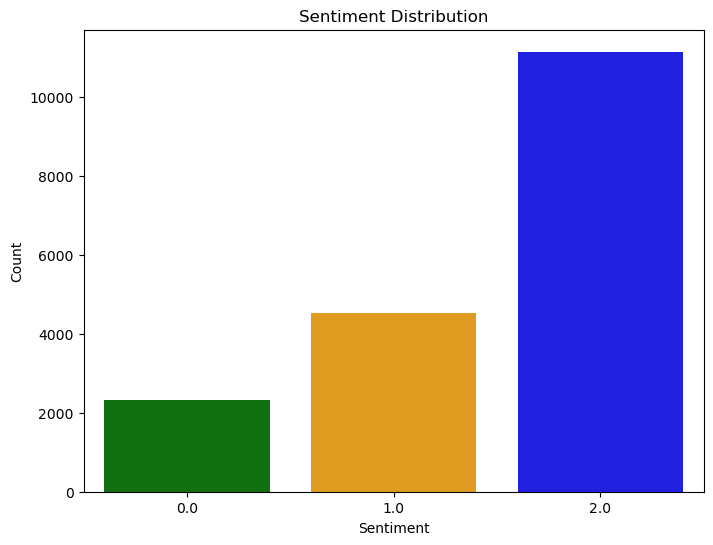

In [19]:
# Visualize Sentiment distribution using a bar plot
colors = {1: 'orange', 0: 'green', 2: 'blue'}

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

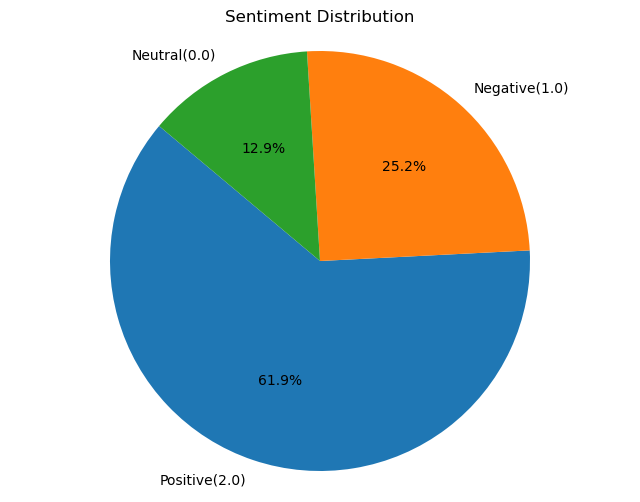

In [20]:
# Create a pie chart for Sentiment distribution
labels = ['Positive(2.0)', 'Negative(1.0)', 'Neutral(0.0)']

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

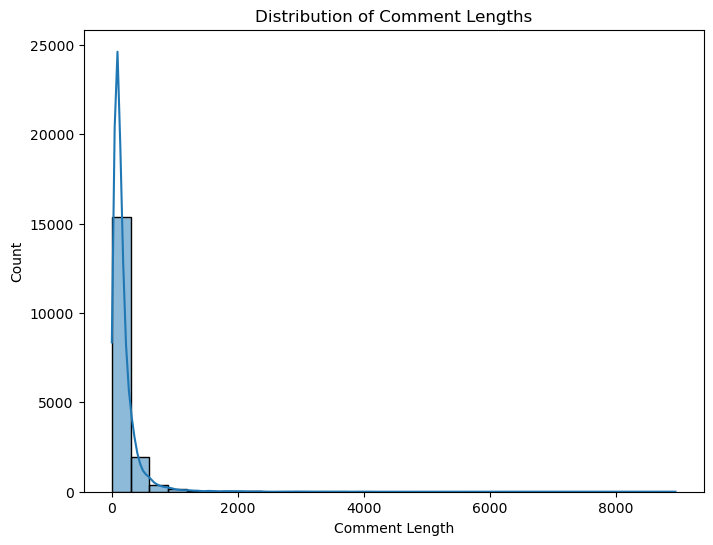

In [21]:
# Histogram of comment lengths
df['Comment_Length'] = df['Comment'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.histplot(df['Comment_Length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

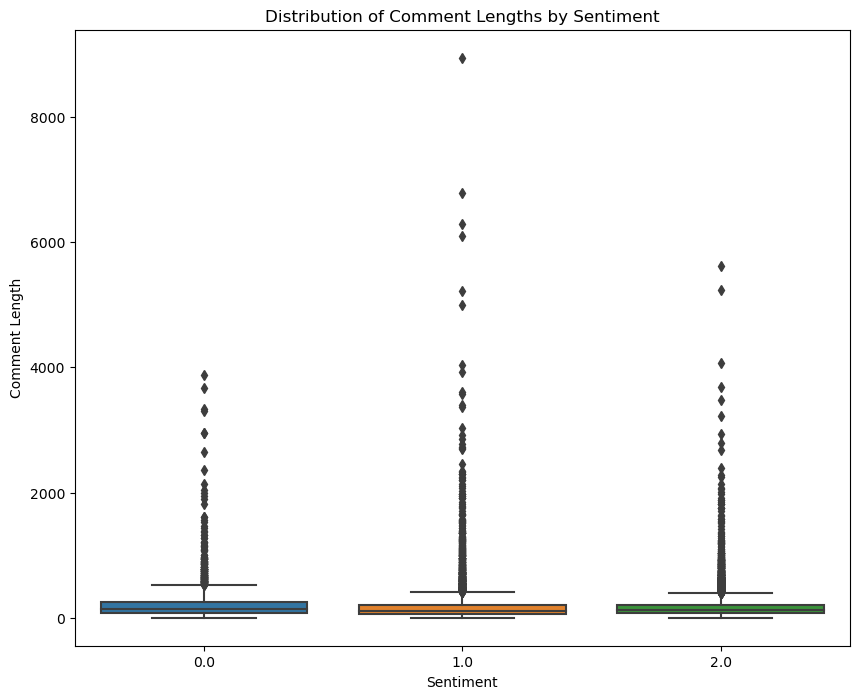

In [22]:
#Box plot to visualize distribution of comment lengths by Sentiment
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sentiment', y='Comment_Length', data=df)
plt.title('Distribution of Comment Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()

## Analysis from Visualization

##### From the sentiment distribution bar chart and pie chart, we can clearly see that the dataset of  youtube video comments contain mostly positive comments i.e approx 62% and from remaining ,25% negative comments and 13% are neutral.

##### From the comment length distribution histogram, it's clear that the most comments length is in the range 0-200 characters. Few are in the range 200-800.

##### Last boxplot is about distribution of sentiment with respect to the comment length. There are some negative comments with length more than 4000 characters. And there are some positive comments in the range 4000-6000 characters.



### Analyze the sentiment of the comment

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [24]:
def sentiment_scores(input_comment, polarity):
 
    # Creating a SentimentIntensityAnalyzer object
    sentiment_object = SentimentIntensityAnalyzer()
 
    sentiment_dict = sentiment_object.polarity_scores(input_comment)
    polarity.append(sentiment_dict['compound'])
 
    return polarity

In [25]:
polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

In [26]:
comments = df.Comment

In [27]:
print("Analysing Comments...")
for index, items in enumerate(comments):
    polarity = sentiment_scores(items, polarity)
 
    if polarity[-1] > 0.05:
        positive_comments.append(items)
    elif polarity[-1] < -0.05:
        negative_comments.append(items)
    else:
        neutral_comments.append(items)
 
# Print polarity
polarity[:5]

Analysing Comments...


[0.6774, 0.836, 0.8718, -0.8981, 0.6786]

In [28]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity,"\n")
if avg_polarity > 0.05:
    print("The Video has got a Positive response.\n")
elif avg_polarity < -0.05:
    print("The Video has got a Negative response.\n")
else:
    print("The Video has got a Neutral response.\n")
 
print("Comment with most positive sentiment: ", comments[polarity.index(max(
    polarity))], "\nwith score= ", max(polarity), "\nand length= ", len(comments[polarity.index(max(polarity))]),"\n")
print("Comment with most negative sentiment: ", comments[polarity.index(min(
    polarity))], "\nwith score= ", min(polarity), "\nand length= ", len(comments[polarity.index(min(polarity))]),"\n")

Average Polarity: 0.4397219906635568 

The Video has got a Positive response.

Comment with most positive sentiment:  This video is so helpful and helped me pass my Master Trainer interview. Richard, your processes and steps are so concise and have given me so much confidence in the interview space. This video is AMAZING and so are all the others. 
with score=  0.9998 
and length=  231 

Comment with most negative sentiment:  As the new Mexican boy at the school in VA,  I didn't speak any English, but there was this beautiful girl in my math class who took her time to teach me by sharing some music, including this song.  After about 2 months of hanging out on a daily basis, we started dating and we were almost inseparable.  One day while she was visiting her grandma in Vermont, some drunk driver crashed into her and she lost her life, along with her dad 😔 .  She was the sweetest person you could ever meet.    I miss her so much 😭 .   I listen to this song imagining her by my side. 
wit

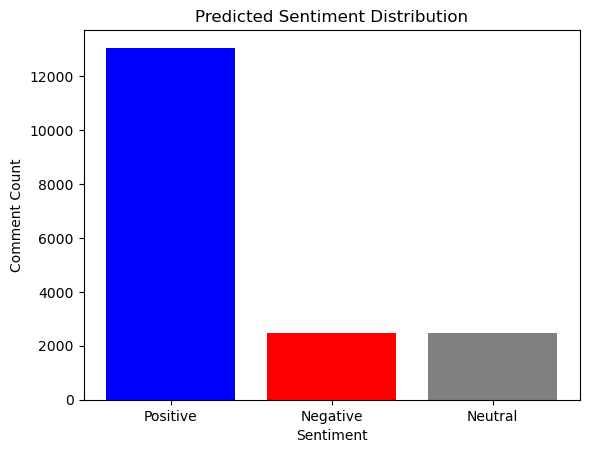

In [29]:
#Bar graph for Predicted Sentiments

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Predicted Sentiment Distribution')


plt.show()

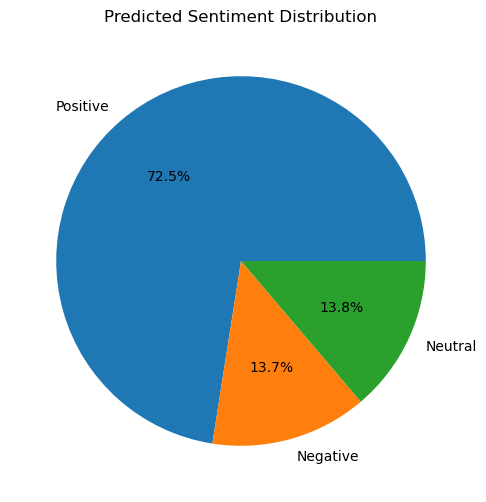

In [30]:
# plotting pie chart for the Predicted Sentiments
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(10, 6))

plt.pie(comment_counts, labels=labels,autopct='%1.1f%%')

plt.title('Predicted Sentiment Distribution')

plt.show()